In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings('ignore')

In [73]:
df = pd.read_csv('/content/Iris.csv')
df.head(102)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
97,98,6.2,2.9,4.3,1.3,Iris-versicolor
98,99,5.1,2.5,3.0,1.1,Iris-versicolor
99,100,5.7,2.8,4.1,1.3,Iris-versicolor
100,101,6.3,3.3,6.0,2.5,Iris-virginica


In [74]:
df = df.drop(columns=["Id"])
df.head(102)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
97,6.2,2.9,4.3,1.3,Iris-versicolor
98,5.1,2.5,3.0,1.1,Iris-versicolor
99,5.7,2.8,4.1,1.3,Iris-versicolor
100,6.3,3.3,6.0,2.5,Iris-virginica


In [27]:
df.describe()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [29]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

# ***`Preprocessing Data`***

In [30]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])
df['Species']

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int64

In [31]:
df.head(100)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,1
96,5.7,2.9,4.2,1.3,1
97,6.2,2.9,4.3,1.3,1
98,5.1,2.5,3.0,1.1,1


# ***`EDA`***

<Axes: >

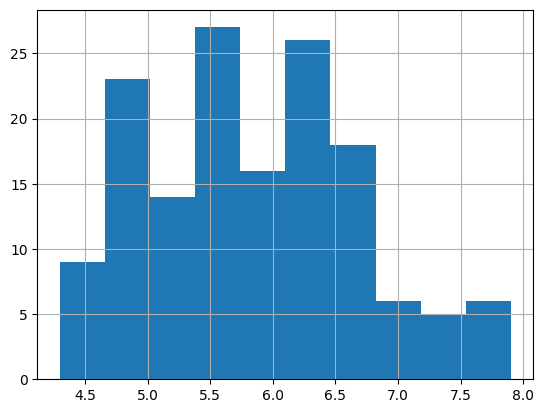

In [32]:
df['SepalLengthCm'].hist()

<Axes: >

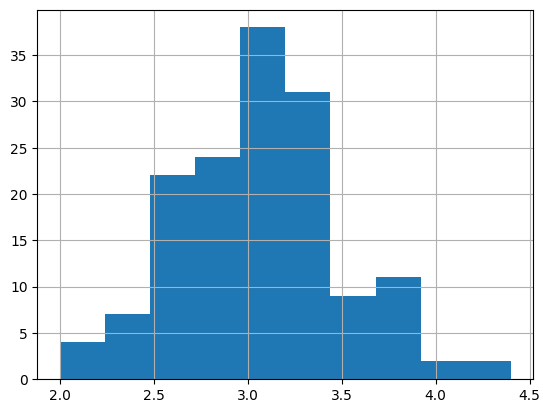

In [33]:
df['SepalWidthCm'].hist()

<Axes: >

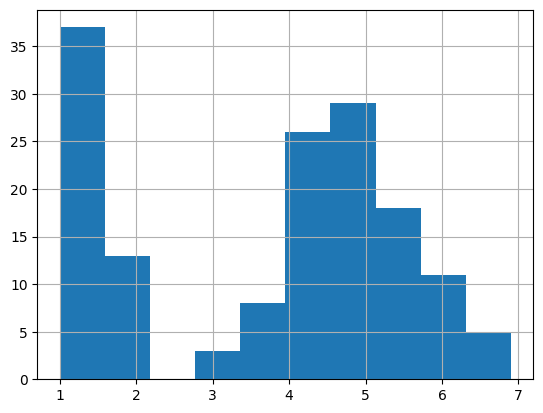

In [34]:
df['PetalLengthCm'].hist()

<Axes: >

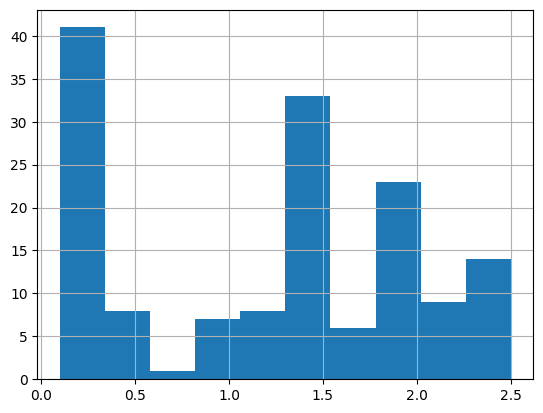

In [35]:
df['PetalWidthCm'].hist()

<Axes: xlabel='Species', ylabel='count'>

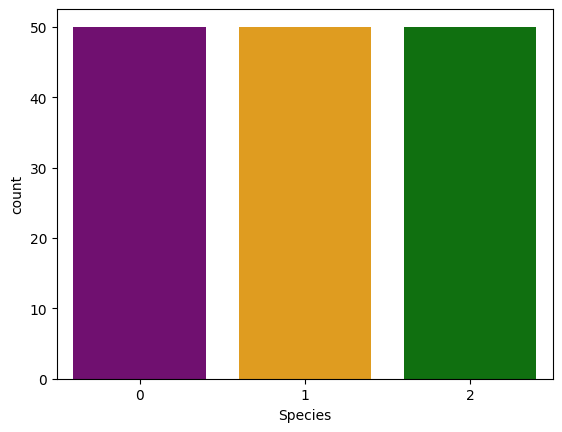

In [36]:
sns.countplot(x='Species',data=df,palette=['purple','orange','green'])

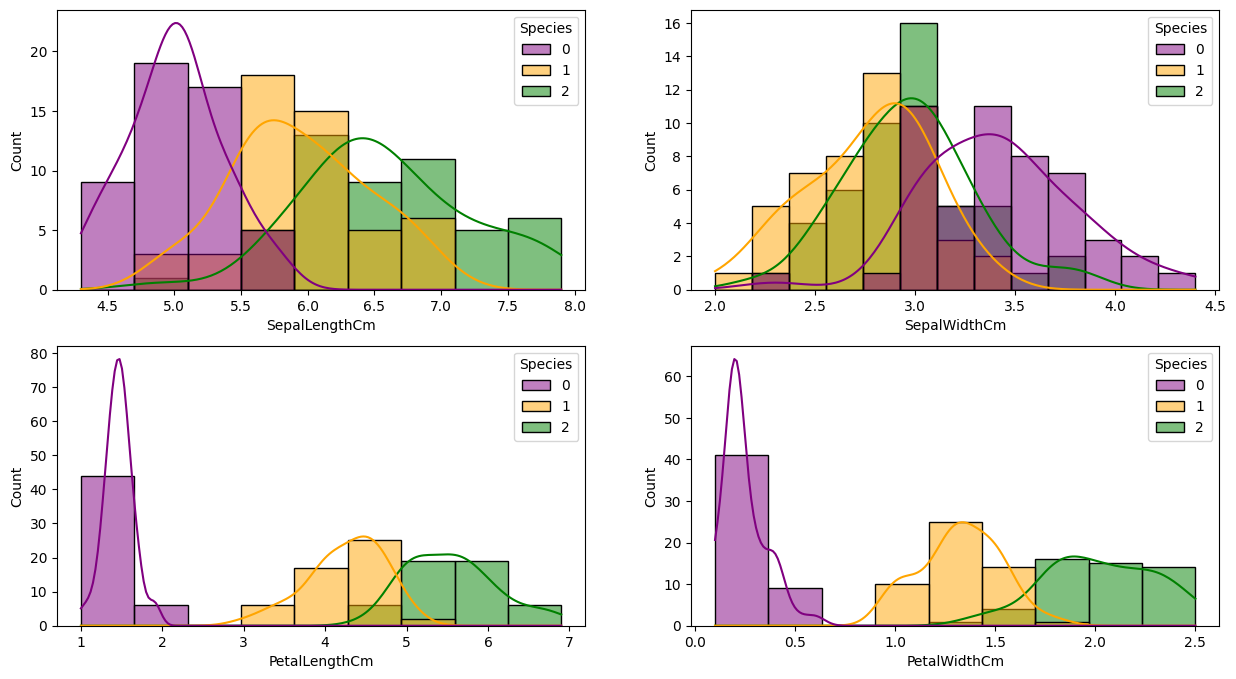

In [37]:
plt.figure(figsize = (15,8))

for i,z in enumerate(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']):
    plt.subplot(2,2,i+1)
    sns.histplot(data = df, x = z,kde = True,hue = 'Species',palette=['purple','orange','green'])
plt.show()

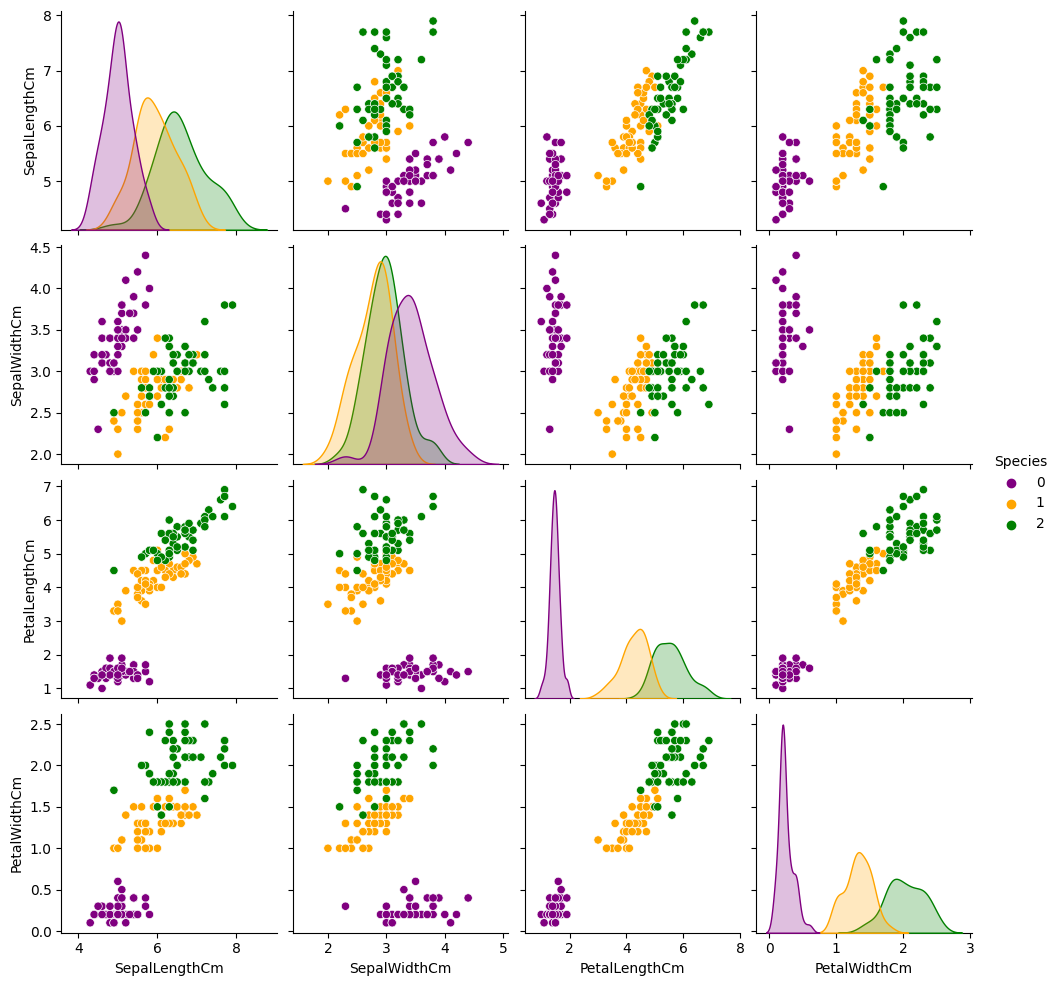

In [38]:
sns.pairplot(data = df , hue = 'Species',palette=['purple','orange','green'])

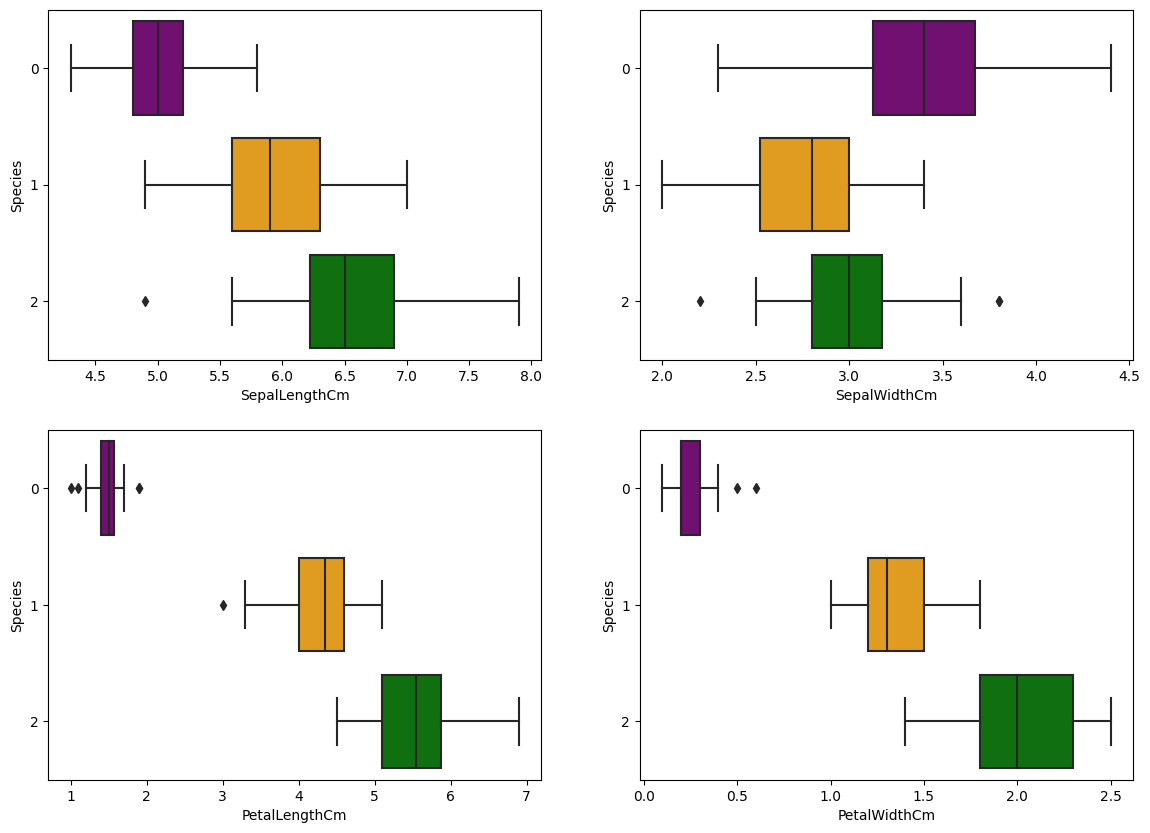

In [39]:
plt.figure(figsize = (14,10))

for i,z in enumerate(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']):
    plt.subplot(2,2,i+1)
    sns.boxplot(data = df, y = 'Species', x = z,orient = 'h',palette=['purple','orange','green'])

plt.show()

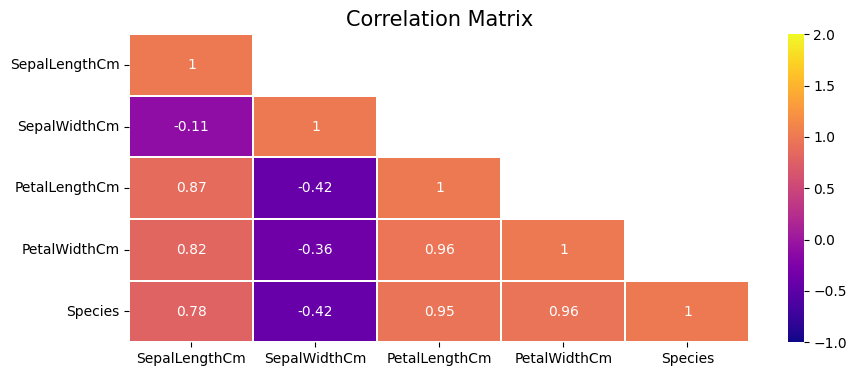

In [40]:
cor =df.corr()
plt.figure(figsize=(10,4))
mask = np.triu(np.ones_like(cor, dtype=bool))
np.fill_diagonal(mask, False)
sns.heatmap(cor, annot=True, mask=mask, vmin=-1, vmax=2,linewidths=0.2, cmap='plasma')
plt.title("Correlation Matrix", fontsize=15)
plt.show()

In [41]:
x = df.drop(columns=['Species'])
y = df['Species']

# ***`Split the dataset into training and testing sets`***

In [42]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

# ***`Model 1 : Logistic Regression Model`***

In [45]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()
model1.fit(x_train, y_train)
accuracy_logreg = model1.score(x_test, y_test) * 100
print("Accuracy using Logistic Regression: ", accuracy_logreg)

Accuracy using Logistic Regression:  97.77777777777777


# ***`K-nearest neighbours Model(KNN)`***

In [46]:
from sklearn.neighbors import KNeighborsClassifier
model2 = KNeighborsClassifier()
model2.fit(x_train, y_train)
accuracy_knn = model2.score(x_test, y_test) * 100
print("Accuracy using KNN: ", accuracy_knn)

Accuracy using KNN:  97.77777777777777


# ***`Decision Tree Model`***

In [48]:
from sklearn.tree import DecisionTreeClassifier
model3 = DecisionTreeClassifier()
model3.fit(x_train, y_train)
accuracy_decision_tree = model3.score(x_test, y_test) * 100
print("Accuracy using Decision Tree: ", accuracy_decision_tree)

Accuracy using Decision Tree:  95.55555555555556


# ***`CONFUSION MATRIX FOR ALL 3 MODELS`***

In [58]:
from sklearn.metrics import confusion_matrix

y_pred1 = model1.predict(x_test)
y_pred2 = model2.predict(x_test)
y_pred3 = model3.predict(x_test)

conf_matrix1 = confusion_matrix(y_test, y_pred1)
conf_matrix2 = confusion_matrix(y_test, y_pred2)
conf_matrix3 = confusion_matrix(y_test, y_pred3)


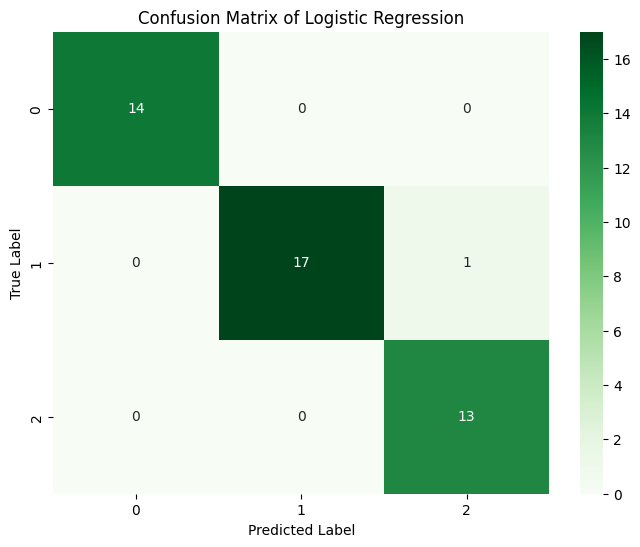

In [59]:
#LOGISTIC REGRESSION
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix1, annot=True, fmt='d', cmap='Greens', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of Logistic Regression')
plt.show()

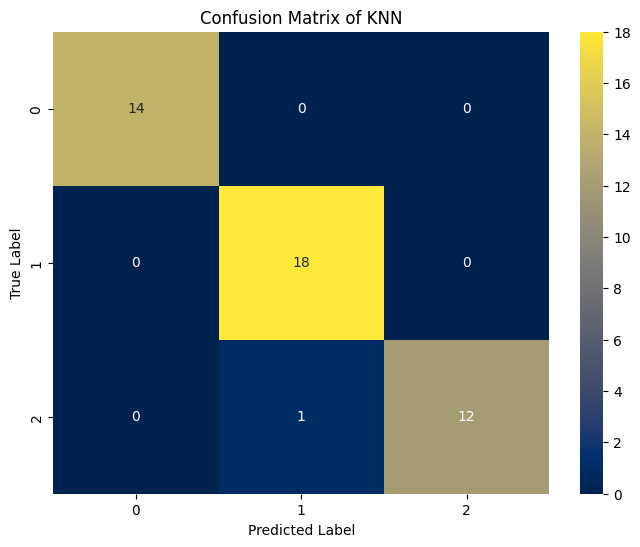

In [60]:
#KNN
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix2, annot=True, fmt='d', cmap='cividis', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of KNN')
plt.show()

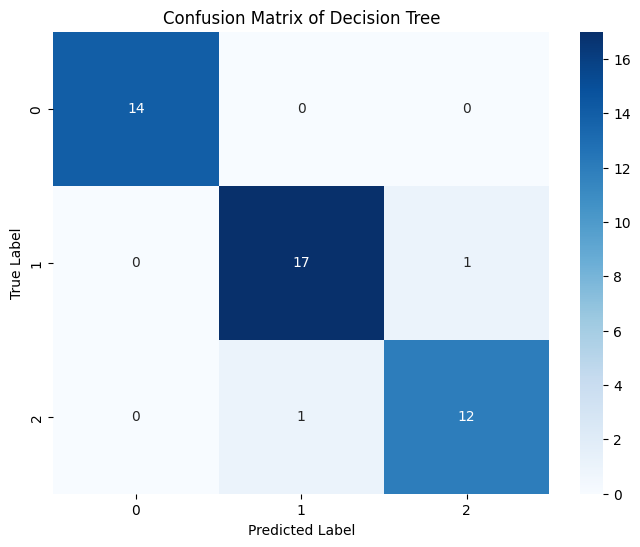

In [61]:
#DECISION TREE
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix3, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of Decision Tree')
plt.show()

# ***`Model Comparison (Visualization)`***

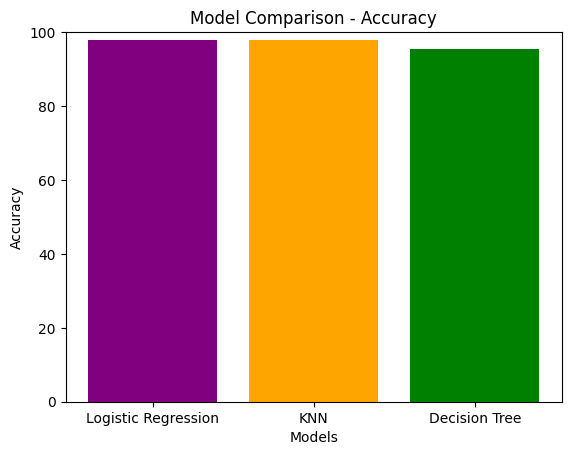

In [64]:
models = ['Logistic Regression', 'KNN', 'Decision Tree']
accuracies = [accuracy_logreg, accuracy_knn, accuracy_decision_tree]

plt.bar(models, accuracies, color=['purple','orange','green'])
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Model Comparison - Accuracy")
plt.ylim([0, 100])
plt.show()